# 1 Suchalgorithmen
## 1.1 Eigenschaften von Suchproblemen
Diskutieren Sie die folgenden Begriffe:
* Zustandsraum
* Aktionen
* Zielzustände
* Initialzustand
* Pfad im Zustandsraum
* Kostenfunktion
* Schrittkosten
* Pfadkosten
* Optimale Lösung

## 1.2 Manuelles Ausrechnen
Bevor wir die Suchalgorithmen implementieren, soll es in dieser Aufgabe darum gehen, die Algorithmen einmal "per Hand", mit Papier und Stift, durchzurechnen. Betrachten Sie dazu folgende Karte. Die Zahlen in Klammern geben jeweils den Wert der Heuristik an.

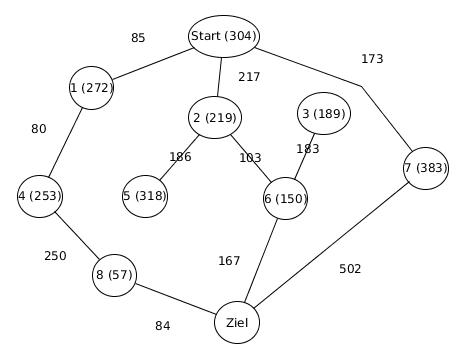

* Benutzen Sie die folgenden Suchalgorithmen um einen Weg zwischen dem Start und dem Ziel zu finden. Notieren Sie Ihre Berechnungen für jeden Schritt. Geben Sie Insbesondere den Inhalt des Stacks / der Queue in jedem Schritt an.
    * Breitensuche
    * Tiefensuche 
    * A* 

## 1.3 Roboter-Navigation

Nun schauen wir uns an, wie die Suchalgorithmen benutzt werden können, um einen Roboter kürzeste Wege finden zu lassen.

Wir nehmen an, dass der Roboter eine Karte der Umgebung hat, und weiß, an welchem Punkt er sich befindet. Um das Ganze einfacher zu machen, nehmen wir außerdem an, dass die Karte ein einfaches 2D-Raster von Zellen ist. Der Roboter kann jede Zelle entweder betreten (`0`) oder die Zelle ist blockiert (`1`). 
In unserer Implementierung ist die Karte eine Matrix von Integers. Zusätzlich gibt es Convenience-Funktionen, um die Nachbarn einer Zelle zu erhalten, und die Distanz zwischen zwei Zellen auszurechnen.


In [ ]:

import numpy as np
import math

def distance(x: int, y: int) -> int:
    return (((x[0]-y[0]))**2+((x[1]-y[1])**2))


class Map:
    def __init__(self, m: np.ndarray) -> None:
        self.m = m
    def neighbors(self,cell):
        nrow,ncol = m.shape
        x,y = cell
        nb = []
        if x>0:
            if m[x-1,y]==0:
                nb = nb + [(x-1,y)]
        if x<(nrow-1):
            if m[x+1,y]==0:
                nb = nb + [(x+1,y)]
        if y>0:
            if m[x,y-1]==0:
                nb = nb + [(x,y-1)]
        if y<(ncol-1):
            if m[x,y+1]==0:
                nb = nb + [(x,y+1)]
        return nb
    
    
    
m = np.array([[0,1,0,0,0,0,0],
              [0,1,0,1,0,0,1],
              [0,1,0,1,0,1,0],
              [0,1,0,1,0,0,0],
              [0,0,0,1,1,0,0],
              [0,0,0,1,1,0,0]])
mm = Map(m)
mm.neighbors((4,1))

## Aufgabe

* Implementieren Sie Tiefensuche, um einen Weg vom Start zum Ziel zu finden. Als Ausgabe soll ein Dictionary ausgegeben werden, dass für jeden (besuchten) Knoten den Vorgänger angibt.
* Implementieren Sie den A*-Algorithmus, um von einem gegebenen Start den kürzesten Weg zum Ziel zu finden. Auch hier soll der Pfad als Liste von Zellen ausgegeben werden. 
* Testen Sie die Implementierungen mit der Karte `mm`, indem Sie den Weg von `(0,0)` zu `(5,6)` mit beiden Algorithmen ausrechnen. 

Weiterhin sind die Implementierungen eines Stacks und einer Priority Queue (Prioritätswarteschlange) gegeben. 

In [ ]:
import heapq
import math

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]
    
class Stack:
    def __init__(self):
        self.elements = []
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, x):
        self.elements.append(x)
    
    def get(self):
        return self.elements.pop()

Ebenfalls ist eine Funktion `make_path(came_from,start,goal)` gegeben, die als Parameter jeweils ein Dictionary von Vorgängern bekommt,wie auch jeweils ein Tupel mit x- und y-Koordinate des Anfangs- und Zielknotens. Das Dictionary speichert für jeden Knoten (=Key) von welchem (Vorgänger-)Knoten (=Value) aus er expandiert wurde. Diese Funktion soll am Ende eines Suchalgorithmus verwendet werden, um das jeweilige Dictionary in einen kürzesten Pfad umgewandelt zu werden!   

In [ ]:
def make_path(came_from: dict, start:tuple[int,int], goal:tuple[int,int]) -> list:
    path=[goal]
    if start==goal:
        return [start]
    nex = came_from[goal]
    while nex != start:
        path.append(nex)
        nex = came_from[nex]
    path.reverse()
    return [start] + path

example_output = {(0,0): None,
                  (1,0): (0,0),
                  (1,1): (1,0),
                  (2,0): (1,0),
                  (2,1): (2,0),
                  (2,2): (2,1)
                 }
start = (0,0)
end = (2,2)
print(make_path(example_output, start, end))

## Aufgabe 
Implementieren Sie den Tiefensuche-Algorithmus, um einen Weg vom Start zum Ziel zu finden. Dabei soll für jeden besuchten Knoten gespeichert werden, von welchem anderen (Vorgänger-)Knoten aus er expandiert/besucht wurde. Verwenden Sie dafür ein Dictionary, welches als Key den jeweils besuchten Knoten und als Value den Vorgänger-Knoten enthält.

In [ ]:
def dfs(map : Map, start:tuple[int,int], goal:tuple[int,int]) -> list:
    unvisited_nodes = 'Welche Datenstruktur benötigen wir hier?'
    unvisited_nodes.put(start)
    # Dictionary indem wir für jeden besuchten Knoten speichern, von welchem Vorgänger-Knoten aus er expandiert wurde
    visited_nodes = {}
    visited_nodes[start] = None
    
    # Implement DFS
    while not unvisited_nodes.empty():
        pass # Lösche bzw. ersetze mich mit dem DFS-Algorithmus
    
    # Umwandeln des Dictionarys mit besuchten Knoten und deren Vorgängern in eine Liste die den gefundenen Pfad enthält
    return make_path(visited_nodes, start, goal)

path_dfs = dfs(mm,(0,0),(5,6))

## Aufgabe 
Implementieren Sie den A*-Algorithmus, um von einem gegebenen Start den kürzesten Weg zum Ziel zu finden. Dabei soll für jeden besuchten Knoten gespeichert werden, von welchem anderen (Vorgänger-)Knoten aus er expandiert/besucht wurde. Verwenden Sie dafür ein Dictionary, welches als Key den jeweils besuchten Knoten und als Value den Vorgänger-Knoten enthält.

In [ ]:
def astar(map : Map, start:tuple[int,int], goal:tuple[int,int]) -> tuple[list, dict]:
    unvisited_nodes = 'Welche Datenstruktur benötigen wir hier?'
    unvisited_nodes.put(start, 0)
    # Dictionary in dem wir für jeden besuchten Knoten speichern, von welchem Vorgänger-Knoten aus er expandiert wurde
    visited_nodes = {}
    visited_nodes[start] = None
    # Dictionary in dem für jeden besuchten Knoten die jeweils geschätzen Kosten bis zum Zielknoten speichern
    cost_so_far = {}
    cost_so_far[start] = 0
    
    # Implement A*
    while not unvisited_nodes.empty():
        pass # Lösche bzw. ersetze mich mit dem A*-Algorithmus
    
    return make_path(visited_nodes,start,goal), cost_so_far


path_astar = astar(mm,(0,0),(5,6), verbose=0)[0]

## Aufgabe
Verwenden Sie die unte definierte Funktion um sich die Map und den jeweils berechneten Weg plotten zu lassen!

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# print(path)

def drawMap(map, path = None):
    plt.matshow(map)
    if path is not None:
        x =  [x[0] for x in path]
        y = [x[1] for x in path]
        fig = plt.plot(y,x)


drawMap(mm.m, path_dfs)
drawMap(mm.m, path_astar)